In [130]:
import numpy
print 'numpy:', numpy.__version__
import scipy
print 'scipy:', scipy.__version__
import sklearn
print 'sklearn:', sklearn.__version__
import matplotlib
print 'matplotlib:', matplotlib.__version__

numpy: 1.9.2
scipy: 0.15.1
sklearn: 0.16.1
matplotlib: 1.4.3


In [156]:
import seaborn as sns

In [139]:
from numpy import nan as NA

In [135]:
from pandas import Series, DataFrame
import pandas as pd

In [132]:
with open("movie_info_dicts.pkl", 'r') as picklefile: 
    movies_dict = pickle.load(picklefile)

In [133]:
movies_dict

{"Everyone's Hero": {'budget': '',
  'critic_rating': 41,
  'distribution': '20th Century Fox',
  'genre': 'Adventure',
  'id': 'Everyones-Hero',
  'method': 'Digital Animation',
  'rating': 'G',
  'release': True,
  'runtime': '',
  'source': 'Original Screenplay',
  'weekend1_date': datetime.datetime(2006, 9, 15, 0, 0),
  'weekend1_gross': 6061762,
  'weekend1_pertheater': 2093,
  'weekend1_rank': 3,
  'weekend1_theaters': 2896,
  'weekend2_date': datetime.datetime(2006, 9, 22, 0, 0),
  'weekend2_gross': 4690466,
  'weekend2_pertheater': 1619,
  'weekend2_rank': 5,
  'weekend2_theaters': 2898,
  'weekend3_date': datetime.datetime(2006, 9, 29, 0, 0),
  'weekend3_gross': 1182556,
  'weekend3_pertheater': 537,
  'weekend3_rank': 15,
  'weekend3_theaters': 2201,
  'weekend4_date': datetime.datetime(2006, 10, 6, 0, 0),
  'weekend4_gross': 256669,
  'weekend4_pertheater': 431,
  'weekend4_rank': 28,
  'weekend4_theaters': 595,
  'weekend5_date': datetime.datetime(2006, 10, 13, 0, 0),
  'we

In [134]:
len(movies_dict)

2152

In [136]:
mf = DataFrame(movies_dict)

In [138]:
mf = mf.T

In [225]:
mf.columns

Index([u'budget', u'critic_rating', u'distribution', u'genre', u'id',
       u'method', u'rating', u'release', u'runtime', u'source',
       u'weekend1_date', u'weekend1_gross', u'weekend1_pertheater',
       u'weekend1_rank', u'weekend1_theaters', u'weekend2_date',
       u'weekend2_gross', u'weekend2_pertheater', u'weekend2_rank',
       u'weekend2_theaters', u'weekend3_date', u'weekend3_gross',
       u'weekend3_pertheater', u'weekend3_rank', u'weekend3_theaters',
       u'weekend4_date', u'weekend4_gross', u'weekend4_pertheater',
       u'weekend4_rank', u'weekend4_theaters', u'weekend5_date',
       u'weekend5_gross', u'weekend5_pertheater', u'weekend5_rank',
       u'weekend5_theaters', u'widest_release', u'year'],
      dtype='object')

In [140]:
mf['budget'] = mf['budget'].replace(to_replace="", value= NA)

In [141]:
mf['critic_rating'] = mf['critic_rating'].replace(to_replace="", value= NA)

In [142]:
mf['runtime'] = mf['runtime'].replace(to_replace="", value= NA)

In [191]:
mf['widest_release'] = mf[['weekend1_theaters', 'weekend2_theaters', 'weekend3_theaters', 'weekend4_theaters', 'weekend5_theaters']].max(axis=1) 

In [223]:
set([type(x)for x in list(mf['weekend1_date'])])

{datetime.datetime}

In [222]:
mf = mf.dropna(subset = ['weekend1_date'])

In [224]:
mf['year']= mf['weekend1_date'].map(lambda x: x.year)

/Users/seanwilson/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [230]:
mdf = mf[mf.year > 2002]

In [257]:
prodhouses = mf['distribution'].value_counts().to_dict()

In [476]:
mlf['widest_release'].describe()

count    1963.000000
mean     2375.533877
std      1118.541282
min         3.000000
25%      1705.000000
50%      2652.000000
75%      3169.000000
max      4468.000000
Name: widest_release, dtype: float64

In [438]:
mlf['distribution'].value_counts()

Warner Bros.              242
Sony Pictures             237
20th Century Fox          198
Universal                 188
Walt Disney               166
Paramount Pictures        156
Lionsgate                 136
Fox Searchlight            72
Focus Features             64
Weinstein Co.              57
Sony Pictures Classics     57
New Line                   54
MGM                        45
Miramax                    39
Relativity                 28
Summit Entertainment       27
Open Road                  22
Dreamworks SKG             22
Roadside Attractions       20
Paramount Vantage          19
Overture Films             15
CBS Films                  14
FilmDistrict               12
Samuel Goldwyn Films       11
Freestyle Releasing        10
Picturehouse               10
Miramax/Dimension          10
Weinstein/Dimension         9
IFC Films                   8
Focus/Rogue Pictures        8
Magnolia Pictures           7
dtype: int64

In [439]:
mlf['rating'].value_counts()

PG-13    848
R        715
PG       333
G         67
dtype: int64

In [440]:
mlf['genre'].value_counts()

Comedy                 468
Drama                  444
Action                 241
Adventure              227
Thriller/Suspense      217
Horror                 135
Romantic Comedy        126
Documentary             44
Musical                 24
Black Comedy            17
Western                 10
Concert/Performance      9
Multiple Genres          1
dtype: int64

In [263]:
att = {k: v for k, v in prodhouses.iteritems() if v > 7}

In [441]:
mlf['source'].value_counts()

Original Screenplay                    990
Based on Fiction Book/Short Story      366
Based on Real Life Events              161
Remake                                 121
Based on Comic/Graphic Novel            84
Based on TV                             68
Based on Factual Book/Article           45
Based on Play                           32
Based on Folk Tale/Legend/Fairytale     25
Based on Game                           17
Spin-Off                                15
Based on Short Film                      8
Based on Musical or Opera                7
                                         7
Based on Theme Park Ride                 5
Based on Toy                             4
Based on Religious Text                  4
Based on Movie                           2
Based on Musical Group                   1
Compilation                              1
dtype: int64

In [453]:
mlf['widest_release'].describe()

count    1963.000000
mean     2375.533877
std      1118.541282
min         3.000000
25%      1705.000000
50%      2652.000000
75%      3169.000000
max      4468.000000
Name: widest_release, dtype: float64

In [343]:
mlf = mdf[mdf.distribution.isin(att)]

In [345]:
mlf = mlf[mlf.rating != 'NC-17']

In [354]:
mlf.size

72631

In [347]:
mlf = mlf[mlf.rating != 'Not Rated']

In [349]:
mlf = mlf[mlf.genre != '']

In [353]:
mlf = mlf[mlf.genre != '']

In [351]:
mlf = mlf[mlf.source != 'blanks']

In [144]:
import sklearn

In [131]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [157]:
%matplotlib inline

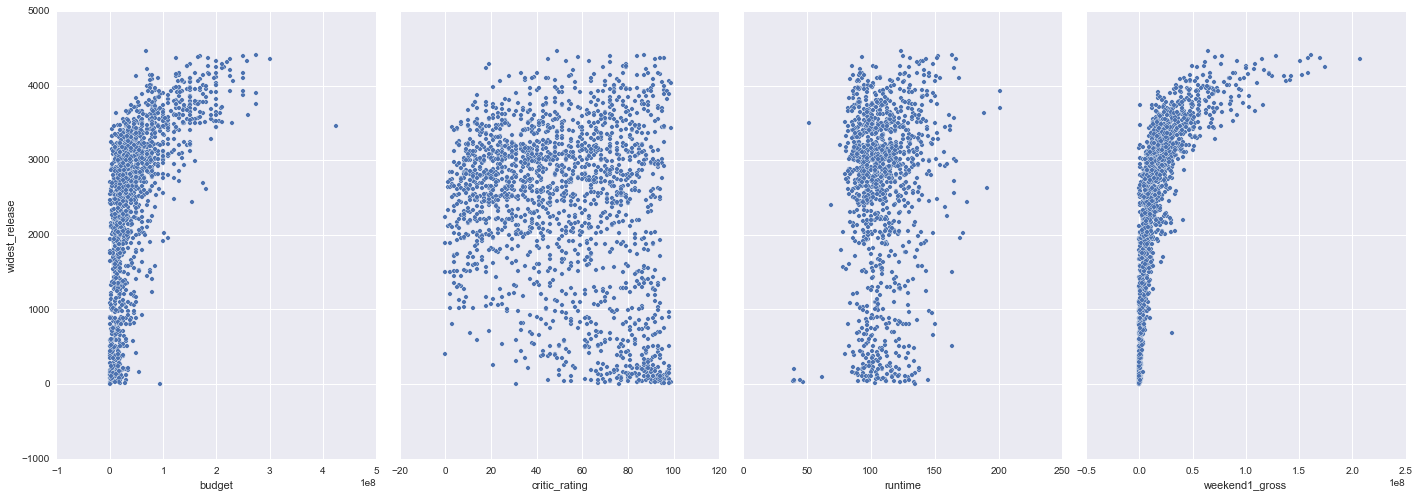

In [355]:
sns.pairplot(mlf, x_vars=['budget', 'critic_rating', 'runtime', 'weekend1_gross'], y_vars='widest_release', size =7, aspect=0.7)

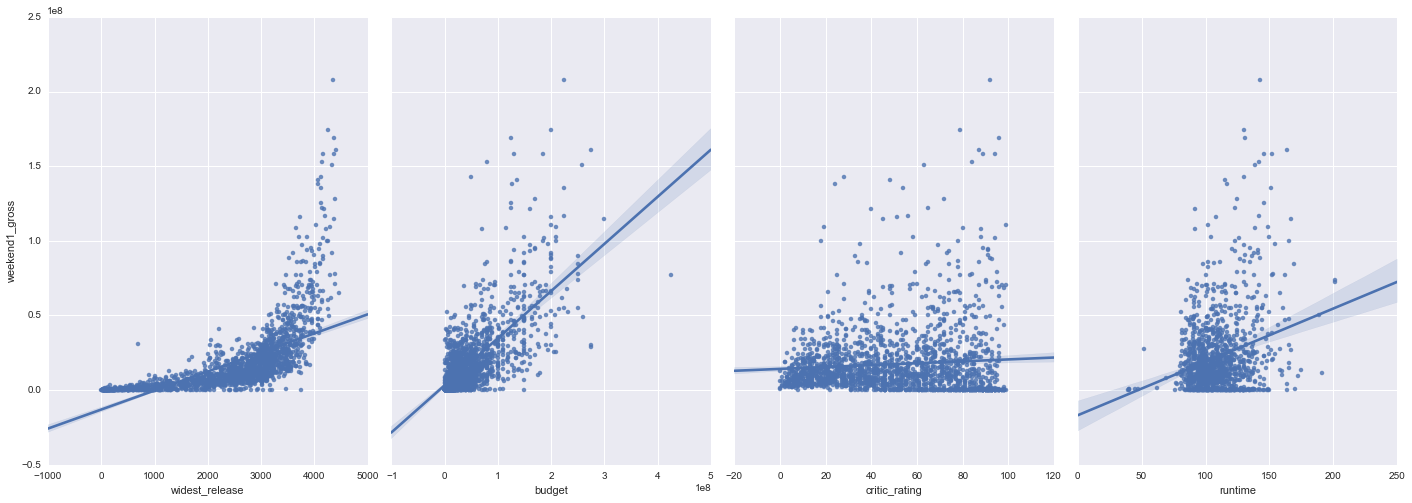

In [479]:
sns.pairplot(mlf, x_vars=['widest_release','budget', 'critic_rating', 'runtime'], y_vars='weekend1_gross', size =7, aspect=0.7, kind='reg')

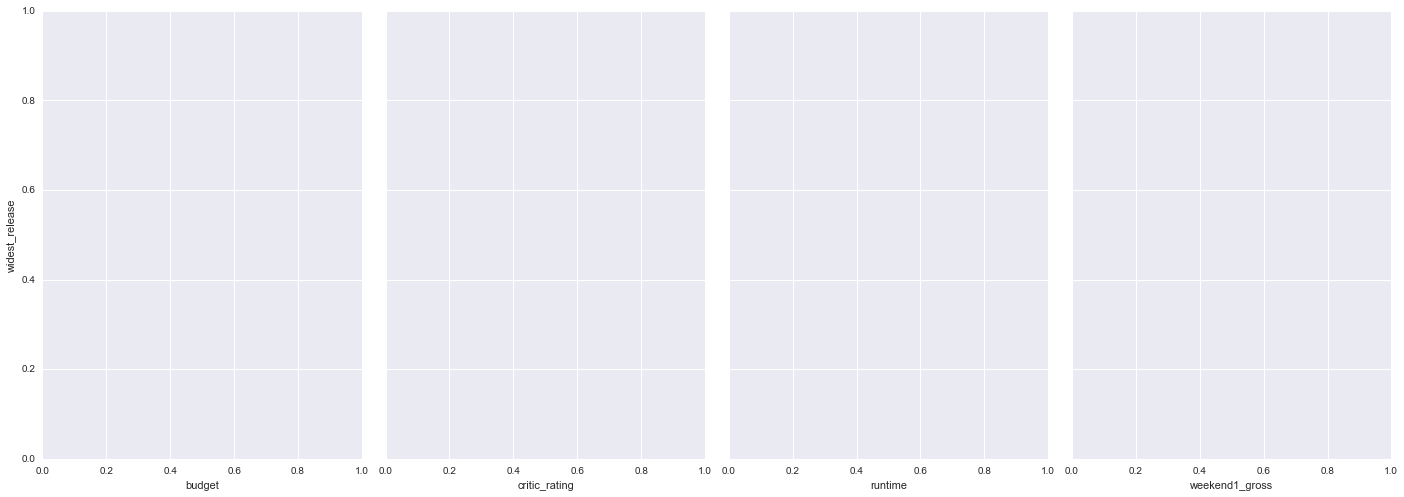

In [457]:
sns.pairplot(mlf, x_vars=['budget', 'critic_rating', 'runtime', 'weekend1_gross'], y_vars='widest_release', size =7, aspect=0.7, kind='log')

In [241]:
from patsy import dmatrices

In [356]:
y, x = dmatrices('widest_release ~ budget + critic_rating + distribution + genre + rating + source + runtime', data =mlf, return_type= 'dataframe' )

In [247]:
import statsmodels.api as sm

In [461]:
model3 = sm.OLS(y, x3)
results3 = model3.fit()

In [340]:
print 'type of model:', type(model)
print 'type of results:', type(results)

type of model: <class 'statsmodels.regression.linear_model.OLS'>
type of results: <class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>


In [358]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         widest_release   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     36.23
Date:                Thu, 16 Jul 2015   Prob (F-statistic):          4.34e-221
Time:                        22:22:14   Log-Likelihood:                -8536.1
No. Observations:                1101   AIC:                         1.720e+04
Df Residuals:                    1035   BIC:                         1.753e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------------
Intercept                                      3042.6101    193.207     15.748      0.000      2663.488  3421.732
distribution[T.CBS Films]                      -555.3032    194.844     -2.850      0.004      -937.638  -172.969
distribution[T.Dreamworks SKG]                  220.3360    171.855      1.282      0.200      -116.888   557.560
distribution[T.FilmDistrict]                   -323.3910    205.967     -1.570      0.117      -727.552    80.770
distribution[T.Focus Features]                -1097.6225    124.785     -8.796      0.000     -1342.482  -852.763
distribution[T.Focus/Rogue Pictures]          -2192.9654    589.047     -3.723      0.000     -3348.828 -1037.103
distribution[T.Fox Searchlight]               -1489.5257    128.357    -11.605      0.000     -1741.395 -1237.656
distribution[T.Freestyle Releasing]           -1001.4202    588.365     -1.702      0.089     -2155.944   153.104
distribution[T.IFC Films]                     -1491.6219    591.354     -2.522      0.012     -2652.011  -331.233
distribution[T.Lionsgate]                      -177.4257     97.662     -1.817      0.070      -369.064    14.212
distribution[T.MGM]                            -485.8788    214.460     -2.266      0.024      -906.704   -65.053
distribution[T.Magnolia Pictures]             -2174.8913    418.762     -5.194      0.000     -2996.611 -1353.171
distribution[T.Miramax]                        -504.1151    204.506     -2.465      0.014      -905.409  -102.821
distribution[T.Miramax/Dimension]              -367.6716    245.578     -1.497      0.135      -849.560   114.216
distribution[T.New Line]                        -66.4721    172.416     -0.386      0.700      -404.796   271.852
distribution[T.Open Road]                      -173.9613    152.541     -1.140      0.254      -473.286   125.364
distribution[T.Overture Films]                 -781.5787    303.076     -2.579      0.010     -1376.293  -186.865
distribution[T.Paramount Pictures]              -57.8704     79.619     -0.727      0.467      -214.103    98.363
distribution[T.Paramount Vantage]             -1201.9322    218.096     -5.511      0.000     -1629.893  -773.971
distribution[T.Picturehouse]                  -1988.2358    586.811     -3.388      0.001     -3139.711  -836.760
distribution[T.Relativity]                      -80.1665    132.939     -0.603      0.547      -341.027   180.694
distribution[T.Roadside Attractions]          -1951.1625    197.569     -9.876      0.000     -2338.844 -1563.481
distribution[T.Samuel Goldwyn Films]          -2108.0322    300.318     -7.019      0.000     -2697.334 -1518.730
distribution[T.Sony Pictures]                   -68.8175     73.945     -0.931      0.352      -213.916    76.281
distr

In [427]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         widest_release   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     41.39
Date:                Fri, 17 Jul 2015   Prob (F-statistic):          1.42e-226
Time:                        10:36:25   Log-Likelihood:                -8538.3
No. Observations:                1101   AIC:                         1.719e+04
Df Residuals:                    1043   BIC:                         1.748e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------------
Intercept                                      3218.9973    194.217     16.574      0.000      2837.898  3600.097
distribution[T.CBS Films]                      -553.3715    194.251     -2.849      0.004      -934.540  -172.203
distribution[T.Dreamworks SKG]                  212.0470    171.412      1.237      0.216      -124.304   548.399
distribution[T.FilmDistrict]                   -329.7852    205.472     -1.605      0.109      -732.970    73.400
distribution[T.Focus Features]                -1100.2329    124.447     -8.841      0.000     -1344.427  -856.038
distribution[T.Focus/Rogue Pictures]          -2194.1493    587.961     -3.732      0.000     -3347.870 -1040.428
distribution[T.Fox Searchlight]               -1489.4113    127.880    -11.647      0.000     -1740.343 -1238.479
distribution[T.Freestyle Releasing]            -999.0512    587.268     -1.701      0.089     -2151.413   153.311
distribution[T.IFC Films]                     -1481.4941    589.906     -2.511      0.012     -2639.032  -323.956
distribution[T.Lionsgate]                      -180.0406     97.390     -1.849      0.065      -371.143    11.062
distribution[T.MGM]                            -492.7301    213.915     -2.303      0.021      -912.482   -72.978
distribution[T.Magnolia Pictures]             -2172.2920    417.847     -5.199      0.000     -2992.209 -1352.375
distribution[T.Miramax]                        -507.6081    204.046     -2.488      0.013      -907.996  -107.221
distribution[T.Miramax/Dimension]              -371.9414    245.084     -1.518      0.129      -852.856   108.973
distribution[T.New Line]                        -68.4504    172.068     -0.398      0.691      -406.090   269.189
distribution[T.Open Road]                      -177.6055    151.833     -1.170      0.242      -475.539   120.328
distribution[T.Overture Films]                 -779.2075    302.439     -2.576      0.010     -1372.666  -185.749
distribution[T.Paramount Pictures]              -60.9615     79.367     -0.768      0.443      -216.699    94.776
distribution[T.Paramount Vantage]             -1197.5539    217.599     -5.503      0.000     -1624.535  -770.573
distribution[T.Picturehouse]                  -1881.6985    438.733     -4.289      0.000     -2742.598 -1020.799
distribution[T.Relativity]                     -104.4253    130.433     -0.801      0.424      -360.366   151.515
distribution[T.Roadside Attractions]          -1951.6898    196.899     -9.912      0.000     -2338.052 -1565.327
distribution[T.Samuel Goldwyn Films]          -2111.9354    299.478     -7.052      0.000     -2699.583 -1524.288
distribution[T.Sony Pictures]                   -74.1848     73.501     -1.009      0.313      -218.412    70.043
distr

In [445]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         widest_release   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     45.28
Date:                Fri, 17 Jul 2015   Prob (F-statistic):          1.19e-229
Time:                        11:13:58   Log-Likelihood:                -8540.9
No. Observations:                1101   AIC:                         1.719e+04
Df Residuals:                    1048   BIC:                         1.745e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------------
Intercept                                      3189.1498    190.175     16.770      0.000      2815.983  3562.317
distribution[T.CBS Films]                      -553.7898    194.224     -2.851      0.004      -934.902  -172.677
distribution[T.Dreamworks SKG]                  212.2524    171.357      1.239      0.216      -123.989   548.493
distribution[T.FilmDistrict]                   -332.7267    205.439     -1.620      0.106      -735.845    70.392
distribution[T.Focus Features]                -1093.4339    124.278     -8.798      0.000     -1337.296  -849.572
distribution[T.Focus/Rogue Pictures]          -2190.9416    587.911     -3.727      0.000     -3344.557 -1037.326
distribution[T.Fox Searchlight]               -1482.4406    127.718    -11.607      0.000     -1733.053 -1231.829
distribution[T.Freestyle Releasing]            -994.3997    587.225     -1.693      0.091     -2146.670   157.870
distribution[T.IFC Films]                     -1486.6028    589.769     -2.521      0.012     -2643.866  -329.339
distribution[T.Lionsgate]                      -177.3778     97.319     -1.823      0.069      -368.341    13.585
distribution[T.MGM]                            -492.0728    213.886     -2.301      0.022      -911.766   -72.380
distribution[T.Magnolia Pictures]             -2173.9541    417.778     -5.204      0.000     -2993.731 -1354.177
distribution[T.Miramax]                        -511.4253    203.921     -2.508      0.012      -911.565  -111.285
distribution[T.Miramax/Dimension]              -371.2126    245.065     -1.515      0.130      -852.086   109.661
distribution[T.New Line]                        -52.6474    171.665     -0.307      0.759      -389.494   284.199
distribution[T.Open Road]                      -172.3043    151.064     -1.141      0.254      -468.726   124.118
distribution[T.Overture Films]                 -718.1599    298.661     -2.405      0.016     -1304.202  -132.117
distribution[T.Paramount Pictures]              -65.6068     79.179     -0.829      0.408      -220.973    89.760
distribution[T.Paramount Vantage]             -1200.1409    217.501     -5.518      0.000     -1626.928  -773.354
distribution[T.Picturehouse]                  -2027.9119    417.386     -4.859      0.000     -2846.920 -1208.904
distribution[T.Relativity]                      -98.0131    129.777     -0.755      0.450      -352.665   156.639
distribution[T.Roadside Attractions]          -1951.7486    196.797     -9.918      0.000     -2337.909 -1565.588
distribution[T.Samuel Goldwyn Films]          -2107.6346    299.386     -7.040      0.000     -2695.098 -1520.171
distribution[T.Sony Pictures]                   -72.1873     73.415     -0.983      0.326      -216.244    71.870
distr

In [462]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         widest_release   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     49.22
Date:                Fri, 17 Jul 2015   Prob (F-statistic):          5.93e-233
Time:                        13:42:17   Log-Likelihood:                -8541.0
No. Observations:                1101   AIC:                         1.718e+04
Df Residuals:                    1052   BIC:                         1.743e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------------
Intercept                                      3174.0987    173.649     18.279      0.000      2833.361  3514.836
distribution[T.CBS Films]                      -544.8709    192.788     -2.826      0.005      -923.164  -166.578
distribution[T.Dreamworks SKG]                  219.1712    169.894      1.290      0.197      -114.198   552.541
distribution[T.FilmDistrict]                   -328.1790    203.952     -1.609      0.108      -728.379    72.021
distribution[T.Focus Features]                -1086.0881    122.503     -8.866      0.000     -1326.466  -845.710
distribution[T.Focus/Rogue Pictures]          -2186.8003    586.477     -3.729      0.000     -3337.598 -1036.003
distribution[T.Fox Searchlight]               -1476.2543    126.022    -11.714      0.000     -1723.537 -1228.971
distribution[T.Freestyle Releasing]            -989.8893    584.058     -1.695      0.090     -2135.940   156.161
distribution[T.IFC Films]                     -1483.6098    587.042     -2.527      0.012     -2635.517  -331.703
distribution[T.Lionsgate]                      -171.2639     95.242     -1.798      0.072      -358.150    15.622
distribution[T.MGM]                            -489.6449    212.509     -2.304      0.021      -906.635   -72.655
distribution[T.Magnolia Pictures]             -2176.4127    415.594     -5.237      0.000     -2991.900 -1360.925
distribution[T.Miramax]                        -498.8839    202.125     -2.468      0.014      -895.499  -102.269
distribution[T.Miramax/Dimension]              -367.3737    243.559     -1.508      0.132      -845.291   110.544
distribution[T.Open Road]                      -165.5006    149.335     -1.108      0.268      -458.528   127.527
distribution[T.Overture Films]                 -713.6752    297.276     -2.401      0.017     -1296.997  -130.353
distribution[T.Paramount Pictures]              -60.3849     77.082     -0.783      0.434      -211.636    90.867
distribution[T.Paramount Vantage]             -1193.4468    215.645     -5.534      0.000     -1616.590  -770.304
distribution[T.Picturehouse]                  -2016.1318    414.913     -4.859      0.000     -2830.283 -1201.980
distribution[T.Relativity]                      -91.8509    128.019     -0.717      0.473      -343.053   159.351
distribution[T.Roadside Attractions]          -1947.5384    195.166     -9.979      0.000     -2330.497 -1564.580
distribution[T.Samuel Goldwyn Films]          -2101.6469    298.230     -7.047      0.000     -2686.841 -1516.453
distribution[T.Sony Pictures]                   -68.2916     70.807     -0.964      0.335      -207.231    70.647
distribution[T.Sony Pictures Classics]        -2013.4079    140.486    -14.332      0.000     -2289.073 -1737.743
distr

In [294]:
from sklearn.linear_model import LogisticRegression

In [361]:
logreg = LogisticRegression()

In [405]:
logreg.fit(x_train, y_train)

/Users/seanwilson/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [406]:
logreg.predict(x_train)

array([ 3461.,  3461.,  3461.,  3461.,  3461.,  3555.,  3461.,  3461.,
        3461.,  3555.,  3461.,  3461.,  3461.,  3461.,  3555.,  3461.,
        3461.,  3461.,  3555.,  3461.,  3461.,  3461.,  3555.,  3555.,
        3461.,  3555.,  3461.,  3461.,  3461.,  3555.,  3461.,  3461.,
        3461.,  3461.,  3461.,  3461.,  3555.,  3461.,  3461.,  3555.,
        3555.,  3461.,  3555.,  3555.,  3461.,  3461.,  3461.,  3555.,
        3555.,  3461.,  3461.,  3461.,  3461.,  3461.,  3461.,  3461.,
        3461.,  3461.,  3461.,  3461.,  3555.,  3461.,  3555.,  3461.,
        3461.,  3555.,  3555.,  3461.,  3555.,  3555.,  3461.,  3461.,
        3461.,  3461.,  3555.,  3461.,  3461.,  3555.,  3555.,  3555.,
        3555.,  3461.,  3555.,  3461.,  3461.,  3555.,  3461.,  3461.,
        3555.,  3461.,  3555.,  3461.,  3461.,  3461.,  3555.,  3555.,
        3461.,  3461.,  3461.,  3461.,  3555.,  4362.,  3555.,  3555.,
        3555.,  3461.,  3555.,  3461.,  3461.,  3555.,  3461.,  3555.,
      

In [408]:
y_predlog = logreg.predict(x_test)

In [301]:
from sklearn import metrics

In [470]:
from sklearn.cross_validation import train_test_split
xa_train, xa_test, ya_train, ya_test = train_test_split(x3, y, random_state = 4)

In [392]:
print x_train.shape
print y_train.shape
print x_test.shape
print Y_test.shape

(825, 68)
(825, 1)
(276, 68)
(276, 1)


In [430]:
print x1_train.shape
print y1_train.shape
print x1_test.shape
print y1_test.shape

(825, 59)
(825, 1)
(276, 59)
(276, 1)


In [447]:
print x2_train.shape
print y2_train.shape
print x2_test.shape
print y2_test.shape

(825, 53)
(825, 1)
(276, 53)
(276, 1)


In [464]:
print x3_train.shape
print y3_train.shape
print x3_test.shape
print y3_test.shape

(825, 49)
(825, 1)
(276, 49)
(276, 1)


In [366]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [465]:
linreg.fit(x3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [466]:
print linreg.intercept_

[ 3328.0105541]


In [432]:
print linreg.intercept_

[ 3406.97286629]


In [398]:
print linreg.coef_

[[  0.00000000e+00  -3.08591034e+02   3.06534373e+02  -1.18691547e+02
   -1.27443100e+03  -2.19930618e+03  -1.71153768e+03  -9.11489095e+02
   -1.50930904e+03  -2.10368123e+02  -5.40742120e+01  -2.21737093e+03
   -5.40025892e+02  -1.96500600e+02  -1.38532234e+02  -4.72099993e+01
   -1.23578264e+03  -7.87581766e+01  -1.55339072e+03   8.54789683e-13
    4.12490772e+01  -2.16438529e+03  -2.16113411e+03  -8.14089854e+01
   -2.08714875e+03  -2.30747348e+02  -1.57745374e+02  -1.56046200e+02
   -2.39072411e+01  -8.88222608e+02   2.97082299e+02   1.33514513e+01
    4.22812517e+02  -9.23188345e-01   7.55704106e+01  -4.24285394e+02
   -3.75147904e+02   8.79395054e+00  -1.09428179e-12  -5.55125038e+01
   -7.20706273e+01  -5.15139183e+01  -1.93127240e+01  -1.22274342e+02
   -2.20002144e+02  -3.83041542e+02   1.42431538e+02   5.55395190e+01
    1.16141774e+00  -1.27184992e+02   6.44701640e+01  -6.16368941e-13
    4.92109842e-13  -3.07855042e+02  -6.63589369e+02  -1.06833451e+02
    5.96096672e+02  

In [433]:
print linreg.coef_

[[  0.00000000e+00  -3.08518490e+02   2.99637878e+02  -1.25026925e+02
   -1.26863518e+03  -2.19917383e+03  -1.70387263e+03  -9.07596038e+02
   -1.48437079e+03  -2.14718306e+02  -7.75580895e+01  -2.20549902e+03
   -5.46019369e+02  -1.96827432e+02  -1.36282138e+02  -5.05053765e+01
   -1.22855931e+03  -7.95055358e+01  -1.54053994e+03   2.17016750e-12
    3.96063865e+00  -2.15448146e+03  -2.17256502e+03  -8.02800240e+01
   -2.08564278e+03  -2.14026347e+02  -1.53680413e+02  -1.51227475e+02
   -1.69188005e+01  -8.96076170e+02   2.81121735e+02   1.41873338e+01
    4.19239026e+02  -8.56510688e+00  -3.17727201e+01  -5.05499062e+02
   -3.92213343e+02   3.31304285e+01  -3.13937950e-14  -6.22962324e+01
   -7.37285500e+01  -5.40792150e+01  -2.39164355e+01  -1.12963154e+02
   -2.15927326e+02  -3.79753781e+02   1.38046152e+02   5.80583844e+00
   -1.24489523e+02  -2.99884754e+02  -6.49935654e+02   6.20192642e+02
    7.45854183e+01   9.31968400e+01  -1.75255808e+01   5.96718005e+01
    6.87863928e-06  

In [332]:
import numpy as np

In [384]:
x_columns = list(x.columns)

In [385]:
x_columns

['Intercept',
 'distribution[T.CBS Films]',
 'distribution[T.Dreamworks SKG]',
 'distribution[T.FilmDistrict]',
 'distribution[T.Focus Features]',
 'distribution[T.Focus/Rogue Pictures]',
 'distribution[T.Fox Searchlight]',
 'distribution[T.Freestyle Releasing]',
 'distribution[T.IFC Films]',
 'distribution[T.Lionsgate]',
 'distribution[T.MGM]',
 'distribution[T.Magnolia Pictures]',
 'distribution[T.Miramax]',
 'distribution[T.Miramax/Dimension]',
 'distribution[T.New Line]',
 'distribution[T.Open Road]',
 'distribution[T.Overture Films]',
 'distribution[T.Paramount Pictures]',
 'distribution[T.Paramount Vantage]',
 'distribution[T.Picturehouse]',
 'distribution[T.Relativity]',
 'distribution[T.Roadside Attractions]',
 'distribution[T.Samuel Goldwyn Films]',
 'distribution[T.Sony Pictures]',
 'distribution[T.Sony Pictures Classics]',
 'distribution[T.Summit Entertainment]',
 'distribution[T.Universal]',
 'distribution[T.Walt Disney]',
 'distribution[T.Warner Bros.]',
 'distribution[T.W

In [388]:
zip(x_columns, list(linreg.coef_))

[('Intercept', array([  0.00000000e+00,  -3.08591034e+02,   3.06534373e+02,
          -1.18691547e+02,  -1.27443100e+03,  -2.19930618e+03,
          -1.71153768e+03,  -9.11489095e+02,  -1.50930904e+03,
          -2.10368123e+02,  -5.40742120e+01,  -2.21737093e+03,
          -5.40025892e+02,  -1.96500600e+02,  -1.38532234e+02,
          -4.72099993e+01,  -1.23578264e+03,  -7.87581766e+01,
          -1.55339072e+03,   8.54789683e-13,   4.12490772e+01,
          -2.16438529e+03,  -2.16113411e+03,  -8.14089854e+01,
          -2.08714875e+03,  -2.30747348e+02,  -1.57745374e+02,
          -1.56046200e+02,  -2.39072411e+01,  -8.88222608e+02,
           2.97082299e+02,   1.33514513e+01,   4.22812517e+02,
          -9.23188345e-01,   7.55704106e+01,  -4.24285394e+02,
          -3.75147904e+02,   8.79395054e+00,  -1.09428179e-12,
          -5.55125038e+01,  -7.20706273e+01,  -5.15139183e+01,
          -1.93127240e+01,  -1.22274342e+02,  -2.20002144e+02,
          -3.83041542e+02,   1.42431538e+0

In [471]:
ya_pred = linreg.predict(xa_test)

In [437]:
print metrics.mean_squared_error(y_test, y_pred)

1569498.73551


In [435]:
print metrics.mean_squared_error(y1_test, y1_pred)

492668.294928


In [451]:
print metrics.mean_squared_error(y2_test, y2_pred)

492782.22474


In [468]:
print metrics.mean_squared_error(y3_test, y3_pred)

487714.343511


In [472]:
print metrics.mean_squared_error(ya_test, ya_pred)

390356.865954


In [409]:
print metrics.mean_squared_error(y_test, y_predlog)

1569498.73551


In [401]:
print metrics.mean_squared_error(y_test, y_pred)

498174.965258


In [473]:
print np.sqrt(metrics.mean_squared_error(ya_test, ya_pred))

624.78545594


In [469]:
print np.sqrt(metrics.mean_squared_error(y3_test, y3_pred))

698.365479897


In [452]:
print np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))

701.984490384


In [436]:
print np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))

701.903337311


In [402]:
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

705.815106992


In [418]:
x1 = x

In [459]:
x3. columns

Index([u'Intercept', u'distribution[T.CBS Films]',
       u'distribution[T.Dreamworks SKG]', u'distribution[T.FilmDistrict]',
       u'distribution[T.Focus Features]',
       u'distribution[T.Focus/Rogue Pictures]',
       u'distribution[T.Fox Searchlight]',
       u'distribution[T.Freestyle Releasing]', u'distribution[T.IFC Films]',
       u'distribution[T.Lionsgate]', u'distribution[T.MGM]',
       u'distribution[T.Magnolia Pictures]', u'distribution[T.Miramax]',
       u'distribution[T.Miramax/Dimension]', u'distribution[T.New Line]',
       u'distribution[T.Open Road]', u'distribution[T.Overture Films]',
       u'distribution[T.Paramount Pictures]',
       u'distribution[T.Paramount Vantage]', u'distribution[T.Picturehouse]',
       u'distribution[T.Relativity]', u'distribution[T.Roadside Attractions]',
       u'distribution[T.Samuel Goldwyn Films]',
       u'distribution[T.Sony Pictures]',
       u'distribution[T.Sony Pictures Classics]',
       u'distribution[T.Summit Entertainme

In [423]:
x1.drop(['source[T.Based on Game]'],inplace=True,axis=1)

In [442]:
x2 = x1

In [443]:
x2.drop(['genre[T.Multiple Genres]', 'source[T.Based on Short Film]', 'genre[T.Western]','genre[T.Concert/Performance]', 'genre[T.Black Comedy]', 'source[T.Based on Musical or Opera]'],inplace=True,axis=1)

In [458]:
x3 = x2

In [460]:
x3.drop(['source[T.Original Screenplay]', 'distribution[T.New Line]', 'genre[T.Thriller/Suspense]', 'source[T.Based on Fiction Book/Short Story]', 'genre[T.Thriller/Suspense]'],inplace=True,axis=1)

In [478]:
y['widest_release'].describe()

count    1101.000000
mean     2743.424160
std      1020.153352
min         3.000000
25%      2419.000000
50%      3002.000000
75%      3443.000000
max      4468.000000
Name: widest_release, dtype: float64